In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

import selenium
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from selenium import webdriver
from bs4 import BeautifulSoup
import time

import datetime as dt
print('Paskaita nr. 41, 1 dalis, 2024-10-14')
print('Pasiruošta (1)',dt.datetime.now().replace(microsecond=0))

Paskaita nr. 41, 1 dalis, 2024-10-14
Pasiruošta (1) 2024-10-14 21:33:51


In [2]:
import os
print(os.getcwd())

/home/administratorius/git/python_kursai/DataScienceNotebooks/Studentai/MykolasOK


In [3]:
print('Jungiuosi prie varle.lt\n',dt.datetime.now().replace(microsecond=0))

opcijos = Options()
opcijos.add_argument('--incognito')
driver = webdriver.Chrome(options=opcijos)
url = 'https://www.varle.lt/dronai/'
driver.get(url)
time.sleep(5) # 5 sekundėms atsidaro naršyklės langas
source = driver.page_source
driver.close()

Jungiuosi prie varle.lt
 2024-10-14 21:33:56


In [4]:
bs = BeautifulSoup(source, 'html.parser')

sk = bs.find('div', {'class':'GRID_ITEM'}).find('a')
print(sk)
print('::REM::')
print(sk['href'])
img = sk.find('img')
print(img['height'])

<a href="/dronai/dronas-dji-mini-2-se-fly-more-combo--23881156.html">
<img alt="Nuotrauka Nr.1" class="product-img primary-img" height="195" loading="lazy" src="https://www.varle.lt/static/uploads/products/235x195/404/bun/bundle-fly-more-dji-mini-2-se-mini-drone.jpg" title="Dronas DJI Mini 2 SE Fly More Combo" width="235"/>
<img alt="Nuotrauka Nr.2" class="product-img secondary-img" height="195" loading="lazy" src="https://www.varle.lt/static/uploads/products/235x195/404/bun/bundle-fly-more-dji-mini-2-se-mini-drone_Wo609zb.jpg" title="Dronas DJI Mini 2 SE Fly More Combo" width="235"/>
</a>
::REM::
/dronai/dronas-dji-mini-2-se-fly-more-combo--23881156.html
195


In [5]:
# Surinkti iš kauno.diena.lt puslapio straipsnių pavadiniumų ilgius, 
# tam panaudoti selenium biblioteką. 
# Surinktus duomenis surašyti į SQLite duomenų bazę. 
# Surašoma infromacija - pavadinimas, nuoroda į straipsnį, žodžių kiekis pavadinime.
# SQLite lentelėje trys stulpeliai.

In [6]:
# import mysql.connector as cnt
import sqlite3

import requests
from bs4 import BeautifulSoup

print('Pasiruošta (2)',dt.datetime.now())

Pasiruošta (2) 2024-10-14 21:34:18.974018


Kauno dienos straipsnių sąrašas išsaugomas Pandas DF
Straipsnių skaičius: 28
Vidutinis straipsnių pavadinimo žodžių skaičius: 8.571


<Axes: xlabel='Žodžių skaičius pavadinime', ylabel='Dažnis'>

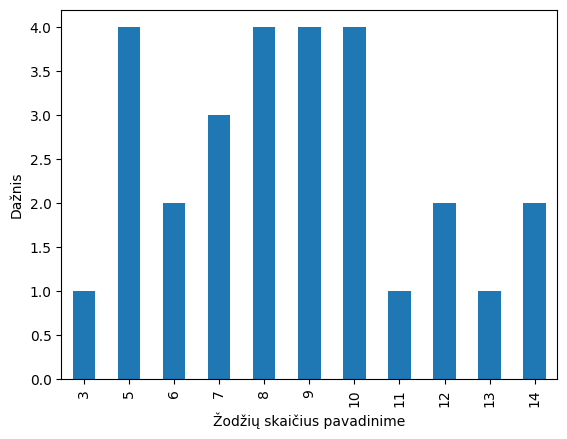

In [8]:
print('Kauno dienos straipsnių sąrašas išsaugomas Pandas DF')

HomeUrl = 'https://kauno.diena.lt/'
page = requests.get(HomeUrl)
source = page.content
bs = BeautifulSoup(source,'html.parser')
# print(bs)
straipsniai=bs.find_all('div',{'class':'category-block-row grid-12 alpha omega unscore'})
# print(straipsniai)

urlLst=[] # Straipsnių nuorodų sąrašas
žskLst=[] # Straipsnių pavadinimų ženklų skaičių sąrašas
pvdLst=[] # Straipsnių pavadinimų sąrašas
for s in straipsniai:
    i=s.find('div',{'class':'articles-list-title-wrapper'})
    if i is not None:
        t=i.find('a',{'class':'articles-list-title'})
        # print(t['href'])
        # print(t.text)
        urlElm=t['href'].split('/')
        if urlElm[0]=='naujienos':
            žodžiai=t.text.split()
            urlLst.append(HomeUrl+t['href'])
            žskLst.append(len(žodžiai))
            pvdLst.append(t.text)
            # print(urlElm)
            # print(len(žodžiai),žodžiai)

df = pd.DataFrame()
df['url']=urlLst # Straipsnio URL
df['žsk']=žskLst # Straipsnio pavadinimo žodžių skaičius
df['pvd']=pvdLst # Straipsnio pavadinimas
df['rsk']=df['pvd'].str.len() # Straipsnio pavadinimo raidžių skaičius

print('Straipsnių skaičius:',df['url'].size)
print('Vidutinis straipsnių pavadinimo žodžių skaičius:',df['žsk'].mean().round(3))

dfGroup=df.groupby('žsk').size()
dfGroup.plot(kind='bar',xlabel='Žodžių skaičius pavadinime',ylabel='Dažnis')

In [9]:
print('Kauno dienos straipsnių sąrašas išsaugomas sqlite3')

HomeUrl = 'https://kauno.diena.lt/'
page = requests.get(HomeUrl)
source = page.content
bs = BeautifulSoup(source,'html.parser')
# print(bs)
straipsniai=bs.find_all('div',{'class':'category-block-row grid-12 alpha omega unscore'})
# print(straipsniai)

Kauno dienos straipsnių sąrašas išsaugomas sqlite3


In [42]:
sdb = sqlite3.connect('Testas.db')
cs = sdb.cursor()

sql_create_table = '''
create table if not exists KaunoDiena_straipsniai
(
    pavadinimas text not null,
    url text not null,
    žodžių_pavadinime real not null,
    raidžių_pavadinime real not null
)
'''
cs.execute(sql_create_table)

for s in straipsniai:
    i=s.find('div',{'class':'articles-list-title-wrapper'})
    if i is not None:
        t=i.find('a',{'class':'articles-list-title'})
        # print(t['href'])
        # print(t.text)
        urlElm=t['href'].split('/')
        if urlElm[0]=='naujienos': # Praledžia išorines nuorodas.
            žodžiai=t.text.split()

            pvd=t.text # Straipsnio pavadinimas
            url=HomeUrl+t['href'] # Straipsnio URL
            žsk=len(žodžiai) # Straipsnio pavadinimo žodžių skaičius
            rsk=len(pvd) # Straipsnio pavadinimo raidžių skaičius

            sql_template = '''insert into KaunoDiena_straipsniai values (?,?,?,?)'''
            cs.execute(sql_template,(pvd,url,žsk,rsk))

sdb.commit()
sdb.close()

print('Atlikta',dt.datetime.now())

Atlikta 2024-10-14 20:05:09.421013
